# Track 1. 한국 음식 이미지 분류

2021 데이터 크리에이터 캠프 (NIA 주최 데이터 분석 대회)에 출제된 문제입니다.
학습데이터 : 3496 장 / 검증데이터 : 689 장 / 평가데이터 : 958 장으로 구성되어 있지만, 평가데이터에 대한 정답지가 없기 때문에 학습데이터 학습하고, 검증데이터로 평가하도록 하겠습니다 (평가데이터는 무시해주세요)
target은 BoiledDown (조림) / Rice (밥) / Noodle (면) / Roasted (구이) / Kimchi (김치) 총 5개로 구성되어 있습니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! unzip -qq '/content/drive/MyDrive/한국음식이미지분류.zip' -d '/content/drive/MyDrive'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        shear_range=0.3,
        horizontal_flip=True,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.25,
)
valid_datagen = ImageDataGenerator(
        rescale=1./255,
)

In [ ]:
batch_size = 64
img_width = 128
img_height = 128

train_data = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/kfood/train',
    batch_size=batch_size,
    target_size=(img_width, img_height),
    shuffle=True,
)
valid_data = valid_datagen.flow_from_directory(
    '/content/drive/MyDrive/kfood/val',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle=False,
)

Found 3490 images belonging to 5 classes.
Found 684 images belonging to 5 classes.


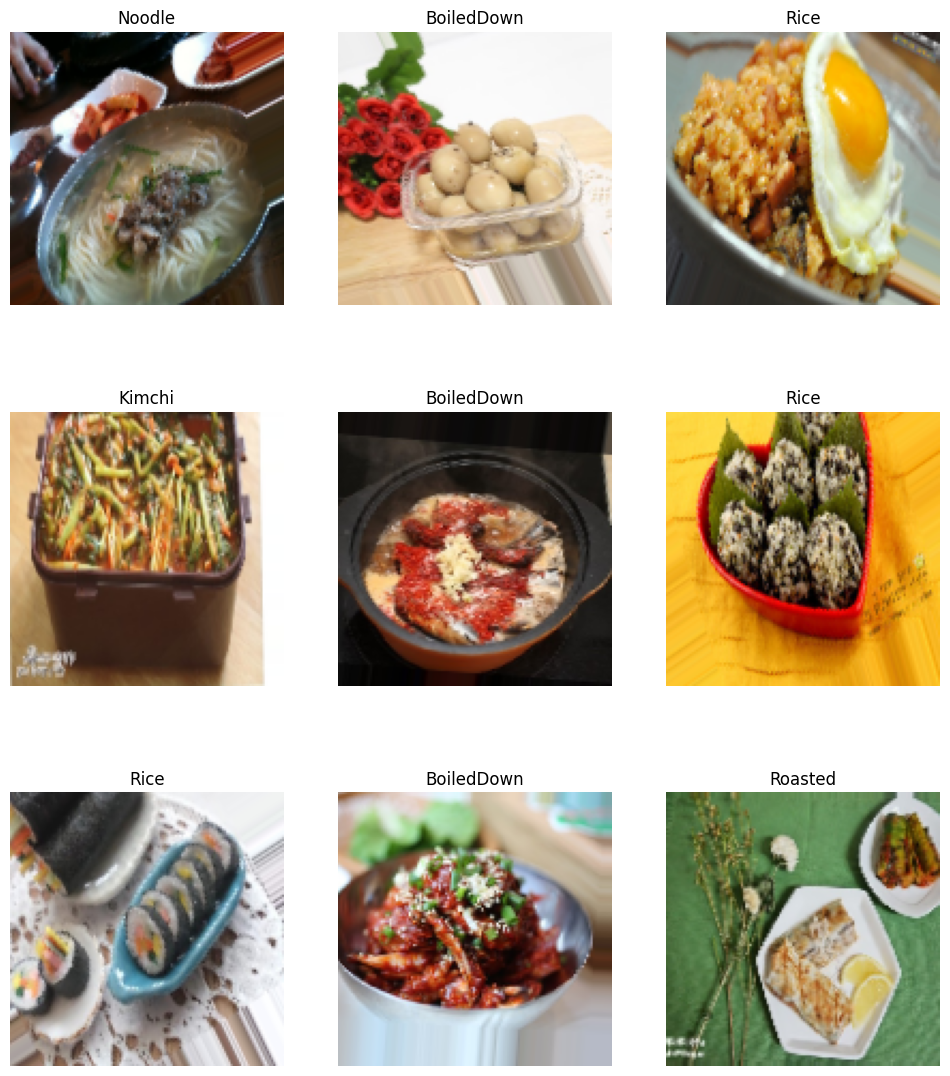

In [ ]:
def visualize_images(images, labels):
    figure, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 14))
    classes = list(train_data.class_indices.keys())
    img_no = 0
    for i in range(3):
        for j in range(3):
            img = images[img_no]
            label_no = np.argmax(labels[img_no])

            ax[i,j].imshow(img)
            ax[i,j].set_title(classes[label_no])
            ax[i,j].set_axis_off()
            img_no += 1

images, labels = next(train_data)
visualize_images(images, labels)

In [ ]:
base = MobileNetV2(input_shape=(img_width, img_height,3),include_top=False,weights='imagenet')
base.trainable = True
model = Sequential()
model.add(base)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss = 'categorical_crossentropy',metrics=['accuracy'])

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',patience = 1,verbose = 1)
early_stop = EarlyStopping(monitor = 'val_accuracy',patience = 5,verbose = 1,restore_best_weights = True)
check_point = ModelCheckpoint('best_model.h5',monitor='val_accuracy',verbose=1,save_best_only=True)

In [ ]:
history = model.fit(train_data, epochs=10, validation_data = valid_data, callbacks=[early_stop,reduce_lr,check_point])

Epoch 1/10
55/55 [==============================] - ETA: 0s - loss: 1.1805 - accuracy: 0.5493 
Epoch 1: val_accuracy improved from -inf to 0.54971, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


55/55 [==============================] - 1457s 26s/step - loss: 1.1805 - accuracy: 0.5493 - val_loss: 1.4864 - val_accuracy: 0.5497 - lr: 0.0010
Epoch 2/10
55/55 [==============================] - ETA: 0s - loss: 0.8233 - accuracy: 0.7037
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 2: val_accuracy did not improve from 0.54971
55/55 [==============================] - 274s 5s/step - loss: 0.8233 - accuracy: 0.7037 - val_loss: 1.8966 - val_accuracy: 0.5029 - lr: 0.0010
Epoch 3/10
55/55 [==============================] - ETA: 0s - loss: 0.6512 - accuracy: 0.7673
Epoch 3: val_accuracy improved from 0.54971 to 0.58918, saving model to best_model.h5
55/55 [==============================] - 279s 5s/step - loss: 0.6512 - accuracy: 0.7673 - val_loss: 1.4287 - val_accuracy: 0.5892 - lr: 1.0000e-04
Epoch 4/10
55/55 [==============================] - ETA: 0s - loss: 0.5478 - accuracy: 0.8029
Epoch 4: val_accuracy improved from 0.58918 to 0.67105, saving model